In [64]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [65]:
#define constants
EPOCHS = 6
#define functions
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label


In [66]:
# Load dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


In [67]:
#Build training pipeline
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)


In [68]:
#Build evaluation pipeline 
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [69]:
#Create and train the model 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

history = model.fit(
    ds_train,
    epochs=EPOCHS,
    validation_data=ds_test,
)


Epoch 1/6


c:\Users\deerx\OneDrive\Pulpit\AI_Model_Metrics\.env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8379 - loss: 0.5941 - val_accuracy: 0.9450 - val_loss: 0.1897
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9535 - loss: 0.1696 - val_accuracy: 0.9601 - val_loss: 0.1342
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9666 - loss: 0.1163 - val_accuracy: 0.9657 - val_loss: 0.1116
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9726 - loss: 0.0941 - val_accuracy: 0.9719 - val_loss: 0.0915
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9792 - loss: 0.0728 - val_accuracy: 0.9742 - val_loss: 0.0862
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0579 - val_accuracy: 0.9756 - val_loss: 0.0777


In [70]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

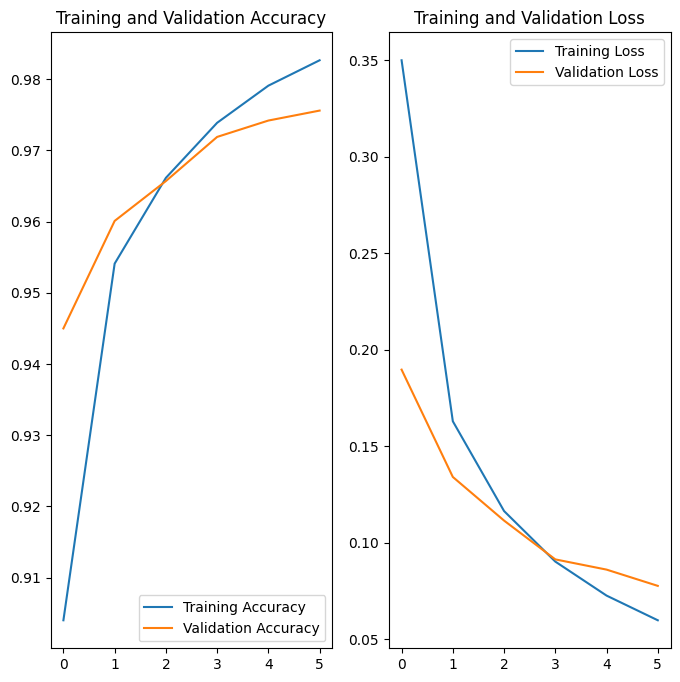

In [71]:
#Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [72]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

predictions = model.predict(ds_test.take(1))
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
This image most likely belongs to 2 with a 100.00 percent confidence.


In [73]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(ds_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

 1/79 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9922 - loss: 0.0311

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0743
Test Loss: 0.0777408555150032
Test Accuracy: 0.975600004196167


In [74]:
# Calculate precision and recall
predictions = model.predict(ds_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.concatenate([y for x, y in ds_test], axis=0)

precision = tf.keras.metrics.Precision()
precision.update_state(true_classes, predicted_classes)
print(f'Test Precision: {precision.result().numpy()}')

recall = tf.keras.metrics.Recall()
recall.update_state(true_classes, predicted_classes)
print(f'Test Recall: {recall.result().numpy()}')



79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Precision: 0.9976739287376404
Test Recall: 0.998558759689331


In [76]:
import unittest

class TestModel(unittest.TestCase):
    def setUp(self):
        (ds_train, ds_test), ds_info = tfds.load(
            'mnist',
            split=['train', 'test'],
            shuffle_files=True,
            as_supervised=True,
            with_info=True,
        )

        def preprocess_images(image, label):
            image = tf.cast(image, tf.float32) / 255.0
            return image, label

        ds_train = ds_train.map(preprocess_images)
        ds_test = ds_test.map(preprocess_images)

        ds_train = ds_train.shuffle(1000).batch(128)
        ds_test = ds_test.batch(128)

        self.ds_train = ds_train
        self.ds_test = ds_test

    def test_model_compile_and_train(self):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10)
        ])
        model.compile(
            optimizer=tf.keras.optimizers.Adam(0.001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
        )

        model.fit(
            self.ds_train,
            epochs=6,
            validation_data=self.ds_test
        )

        # Check if training and validation accuracy are within expected range
        self.assertTrue(history.history['accuracy'][-1] > 0.9)
        self.assertTrue(history.history['val_accuracy'][-1] > 0.9)

    def test_model_evaluation(self):
        model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(10)
        ])
        model.compile(
            optimizer=tf.keras.optimizers.Adam(0.001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
        )

        model.fit(
            self.ds_train,
            epochs=6,
            validation_data=self.ds_test
        )

        test_loss, test_accuracy = model.evaluate(self.ds_test)

        # Check if test accuracy is within expected range
        self.assertTrue(test_accuracy > 0.9)
        self.assertTrue(test_loss < 0.1)

unittest.main(argv=[''], verbosity=2, exit=False)


test_model_compile_and_train (__main__.TestModel.test_model_compile_and_train) ... 

Epoch 1/6


c:\Users\deerx\OneDrive\Pulpit\AI_Model_Metrics\.env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8309 - loss: 0.6125 - val_accuracy: 0.9420 - val_loss: 0.1992
Epoch 2/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9476 - loss: 0.1809 - val_accuracy: 0.9582 - val_loss: 0.1409
Epoch 3/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9635 - loss: 0.1267 - val_accuracy: 0.9669 - val_loss: 0.1142
Epoch 4/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9722 - loss: 0.0969 - val_accuracy: 0.9707 - val_loss: 0.0991
Epoch 5/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9785 - loss: 0.0772 - val_accuracy: 0.9729 - val_loss: 0.0940
Epoch 6/6
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9810 - loss: 0.0653 - val_accuracy: 0.9742 - val_loss: 0.0865


ok
test_model_evaluation (__main__.TestModel.test_model_evaluation) ... 

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8264 - loss: 0.6093 - val_accuracy: 0.9442 - val_loss: 0.1916
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9511 - loss: 0.1715 - val_accuracy: 0.9599 - val_loss: 0.1346
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9649 - loss: 0.1209 - val_accuracy: 0.9666 - val_loss: 0.1088
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9731 - loss: 0.0941 - val_accuracy: 0.9692 - val_loss: 0.0999
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9775 - loss: 0.0775 - val_accuracy: 0.9725 - val_loss: 0.0910
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9728 - loss: 0.0891


ok
test_isupper (__main__.TestStringMethods.test_isupper) ... ok
test_split (__main__.TestStringMethods.test_split) ... ok
test_upper (__main__.TestStringMethods.test_upper) ... ok

----------------------------------------------------------------------
Ran 5 tests in 31.047s

OK
